<a href="https://colab.research.google.com/github/pavithraaanetizen/project-no-3rd.ipyn/blob/main/predicting_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd

url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

In [2]:
df.drop('customerID', axis=1, inplace=True)  # Remove irrelevant column

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric
df.dropna(inplace=True)  # Remove rows with missing/invalid values

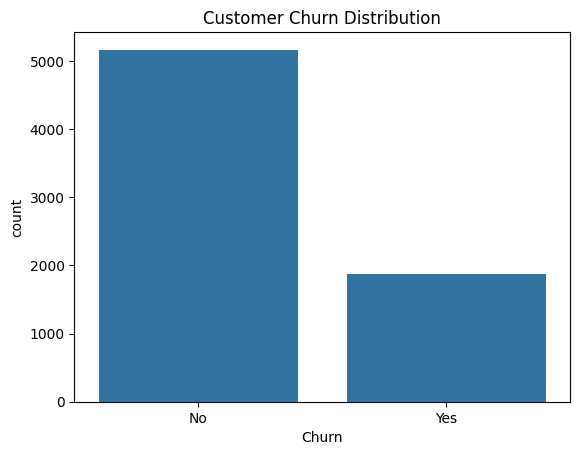

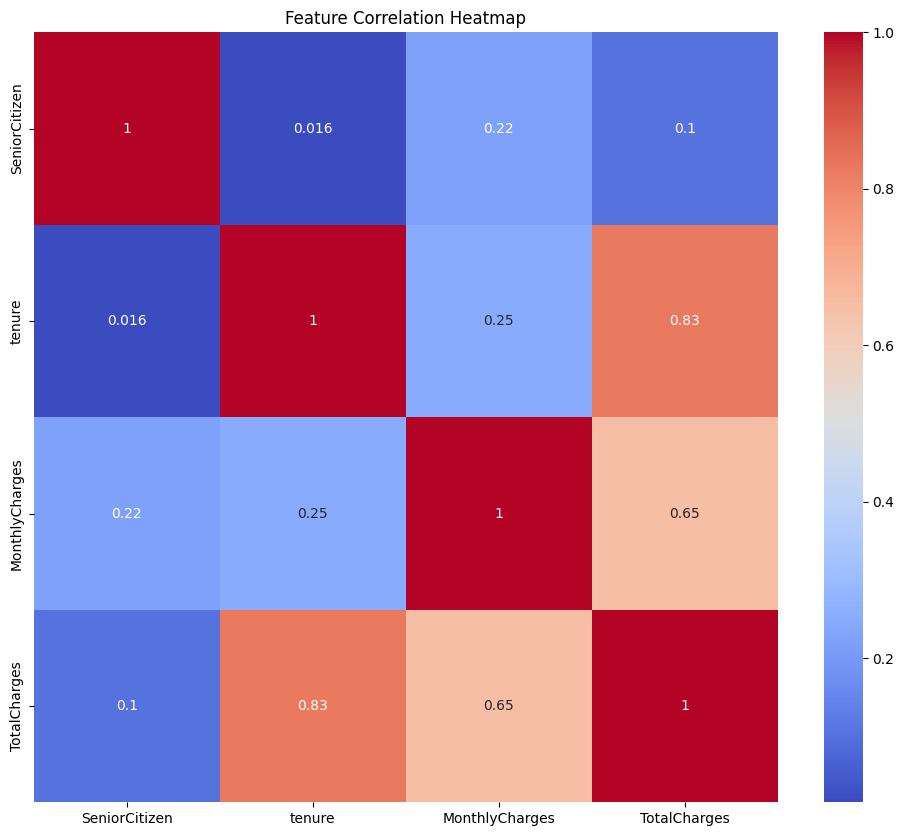

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

df.drop('customerID', axis=1, inplace=True)  # Remove irrelevant column

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric
df.dropna(inplace=True)  # Remove rows with missing/invalid values

# Select only numeric features for correlation
numeric_features = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_features]

# Example: Distribution of Churn
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

# Example: Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
for column in df.select_dtypes(include='object').columns:
    if column != 'Churn':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Feature-target split
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object', 'int64']).columns # Include int64 columns if they represent categorical data
numerical_features = X_train.select_dtypes(include=['float64']).columns

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')), # Use sparse=False for compatibility with StandardScaler
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Create a pipeline with preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression()),
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

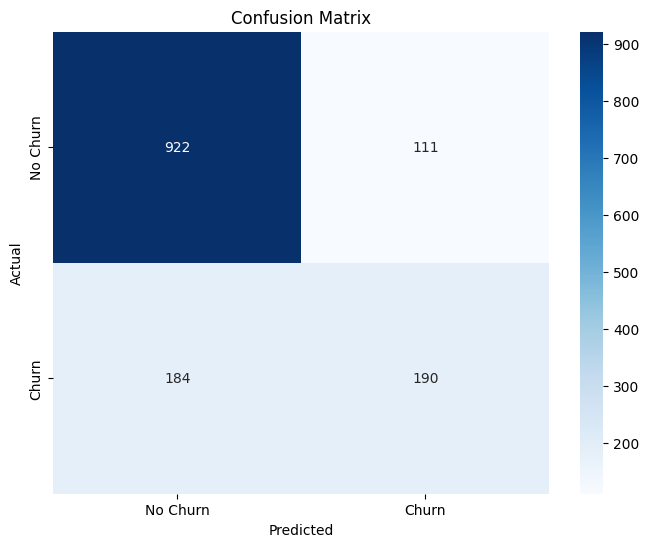

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Assuming 'df' is already loaded and preprocessed as in your previous code

# Feature-target split
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object', 'int64']).columns
numerical_features = X_train.select_dtypes(include=['float64']).columns

# Create preprocessing pipelines
numerical_pipeline = Pipeline([('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Create a pipeline with preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression()),
])

# Fit the pipeline and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()